In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

Apple = yf.download("AAPL",start="2010-01-01",end="2023-01-01")

In [2]:
df=yf.download("AAPL",start="2010-01-01",end="2023-01-01")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127045,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [5]:
df= df.drop(['Date','Adj Close'],axis=1)

In [6]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


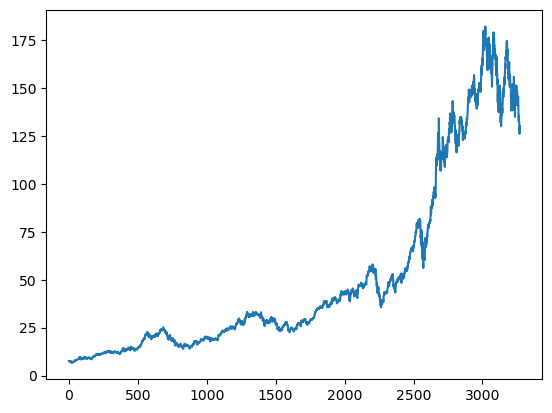

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()

In [9]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

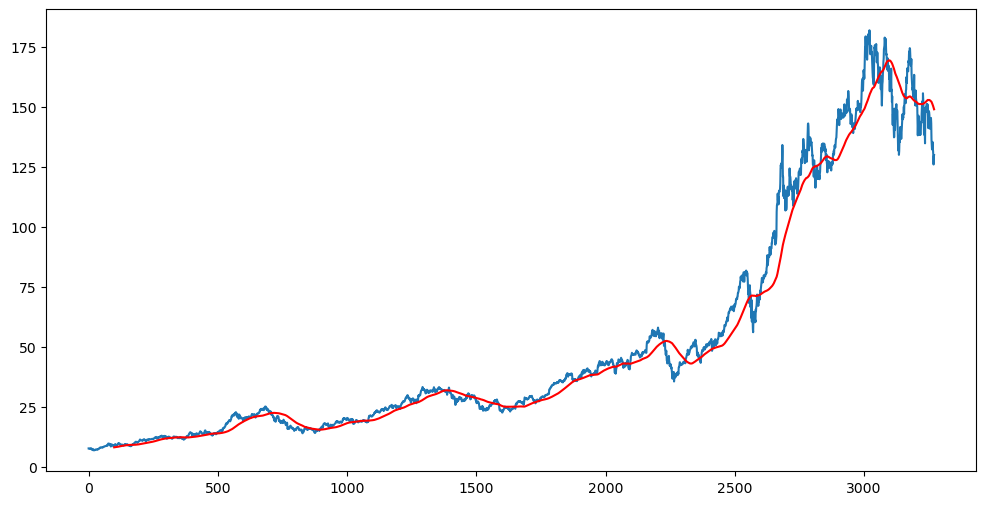

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

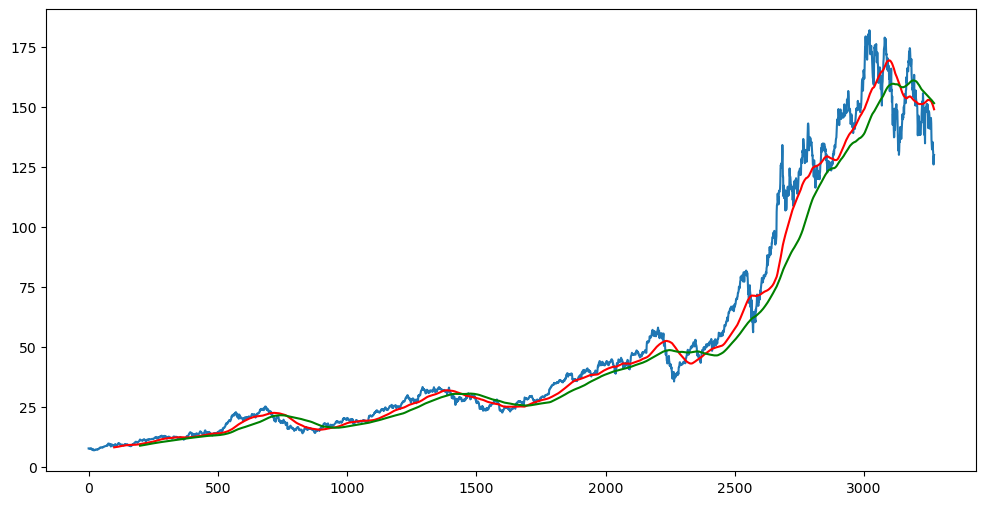

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


## data training 70%

In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


## data testing  30%

In [15]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [18]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [19]:
x_train.shape

(2190, 100, 1)

# Now we are gone use LSTM model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
from keras.layers import Flatten

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

model.add(Flatten())  # Flatten layer to convert output to 2D

model.add(Dense(units=1))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=5)


Epoch 1/5

69/69 [==============================] - 23s 212ms/step - loss: 0.0341
Epoch 2/5
69/69 [==============================] - 15s 211ms/step - loss: 0.0065
Epoch 3/5
69/69 [==============================] - 15s 212ms/step - loss: 0.0058
Epoch 4/5
69/69 [==============================] - 15s 215ms/step - loss: 0.0053
Epoch 5/5
69/69 [==============================] - 14s 201ms/step - loss: 0.0049


In [23]:
model.save('keras_model.h5')

C:\Users\Mukul\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [25]:
data_training.tail()

,Close
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001
2289,42.735001


In [26]:
past_100_days=data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [28]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [30]:
input_data.shape


(1082, 1)

# should have made pipe for this it should be executed in the following sequence

(982, 100, 1)
(982,)
31/31 [==============================] - 2s 72ms/step


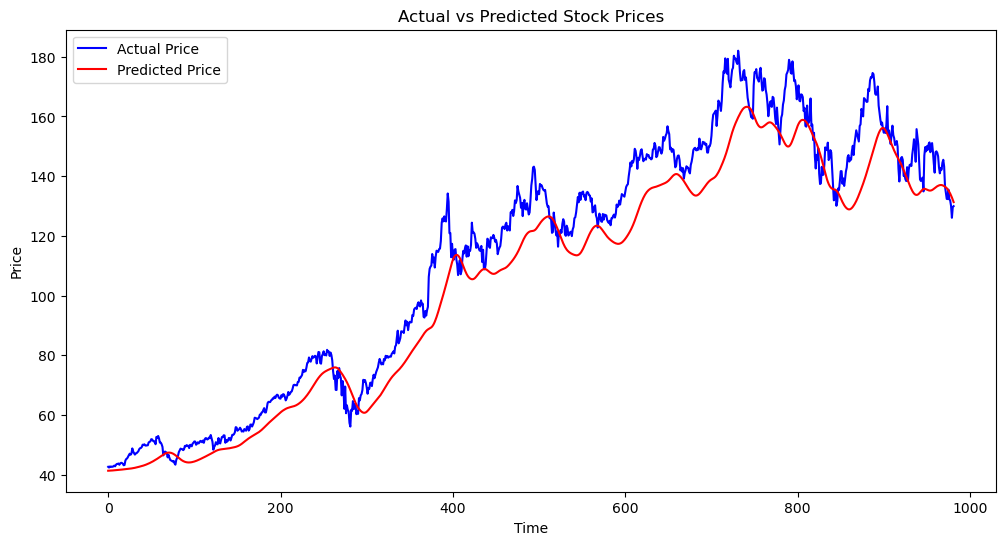

In [46]:
x_test =[]
y_test =[]
for i in range(100 ,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

###
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

## Make predictions
y_predicted = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))  # Reshape to 2D

# Inverse transform test data for plotting
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_predicted, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()